<a href="https://colab.research.google.com/github/Proberto2410/IGTI-Bootcamp-Module-1-Machine-Learning-Analist/blob/master/Module_1__Bootcamp_Machine_Learning_Practical_Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is used for the development of the Practical Work of the 
discipline Fundamentals of the Machine Learning at IGTI's Bootcamp:
1. EDA - Exploratory Data Analysis
2. Dataset cleaning
3. Identification of Outliers
4. Linear Regression Analysis

In [1]:
#import the libraries
import pandas as pd # library used to work with dataframes
import numpy as np # library used in the treatment of matrices and vectors
import matplotlib.pyplot as plt # library used to plot graphs
import seaborn as sn # library used to plot graphics in a more "elegant" format

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files  ## library used to upload data to google colab
uploaded = files.upload()

Saving data.csv to data.csv


In [3]:
#dataframe loading
nome_do_arquivo="data.csv"
dataframe_envio_portos= pd.read_csv(nome_do_arquivo)

In [4]:
## showing the first 5 rows of the dataframe
dataframe_envio_portos.head()

,valid_import,item,importer_id,exporter_id,country_of_origin,declared_quantity,declared_cost,mode_of_transport,route,date_of_departure,date_of_arrival,declared_weight,actual_weight,days_in_transit
0,True,cigar,111,222,India,129,3784.402551,sea,asia,04/25/2019,05/13/2019,1608.605135,1637.661221,18.232857
1,True,cigar,111,222,India,104,3081.350806,sea,america,04/22/2019,05/24/2019,831.719301,848.273419,32.436029
2,True,cigar,111,222,India,130,4414.125741,sea,europe,04/29/2019,05/16/2019,1527.704165,1582.063911,16.996206
3,True,cigar,111,222,India,143,2533.535991,sea,panama,05/05/2019,05/25/2019,1138.680563,1179.993817,19.965886
4,True,cigar,111,222,China,141,4396.397887,sea,asia,05/14/2019,06/05/2019,761.744581,781.735080,22.160034


In [5]:
#showing the characteristics of the dataset
dataframe_envio_portos.info() #checking the types of variables and whether or not there are null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   valid_import       120 non-null    bool   
 1   item               120 non-null    object 
 2   importer_id        120 non-null    int64  
 3   exporter_id        120 non-null    int64  
 4   country_of_origin  120 non-null    object 
 5   declared_quantity  120 non-null    int64  
 6   declared_cost      120 non-null    float64
 7   mode_of_transport  120 non-null    object 
 8   route              120 non-null    object 
 9   date_of_departure  120 non-null    object 
 10  date_of_arrival    120 non-null    object 
 11  declared_weight    120 non-null    float64
 12  actual_weight      120 non-null    float64
 13  days_in_transit    120 non-null    float64
dtypes: bool(1), float64(4), int64(3), object(6)
memory usage: 12.4+ KB


In [6]:
dataframe_envio_portos.shape

(120, 14)

In [7]:
#finding statistics description for variables
dataframe_envio_portos.describe()

,importer_id,exporter_id,declared_quantity,declared_cost,declared_weight,actual_weight,days_in_transit
count,120.0,120.0,120.000000,120.000000,120.000000,120.000000,120.000000
mean,111.0,222.0,127.458333,6743.649881,1264.702934,1306.429806,35.424705
std,0.0,0.0,14.641311,2991.797050,633.149971,656.911704,26.571591
min,111.0,222.0,100.000000,1441.012419,18.459509,19.275241,12.410325
25%,111.0,222.0,115.750000,4442.903914,820.314400,841.763738,18.225625
50%,111.0,222.0,131.500000,6010.218745,1255.597743,1305.716419,27.044293
75%,111.0,222.0,139.000000,8887.095370,1711.314045,1763.681083,44.356374
max,111.0,222.0,149.000000,14281.325362,2806.338955,2918.681683,147.787560


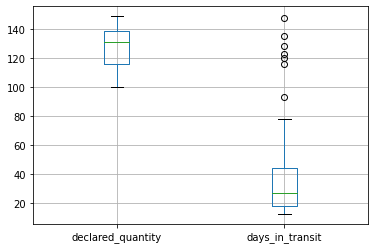

In [8]:
#checking for outliers
dataframe_envio_portos[['declared_quantity','days_in_transit']].boxplot()

In [11]:
#performing the regression analysis
x=dataframe_envio_portos['declared_weight'].values  #predictor 
Y=dataframe_envio_portos['actual_weight'].values #outcome

In [12]:
#importing the univariate linear regression model
from sklearn.linear_model import LinearRegression

In [13]:
#Performs the construction of the regression model
reg= LinearRegression()
x_Reshaped=x.reshape((-1, 1)) #puts data in 2D format
regressao= reg.fit (x_Reshaped,Y) #finds the coefficients (performs the regression)

In [15]:
#perfomrs the forecast
previsao=reg.predict(x_Reshaped)

In [14]:
#model analysis
from sklearn.metrics import r2_score #method for calculating R2 (coefficient of determination)

In [16]:
#found parameters
print('Y = {}X {}'.format(reg.coef_,reg.intercept_))

R_2 = r2_score(Y, previsao)  #performs the R2 calculation

print("Coeficiente de Determinação (R2):", R_2)


Y = [1.03718115]X -5.296233030439225
Coeficiente de Determinação (R2): 0.9993288165644932


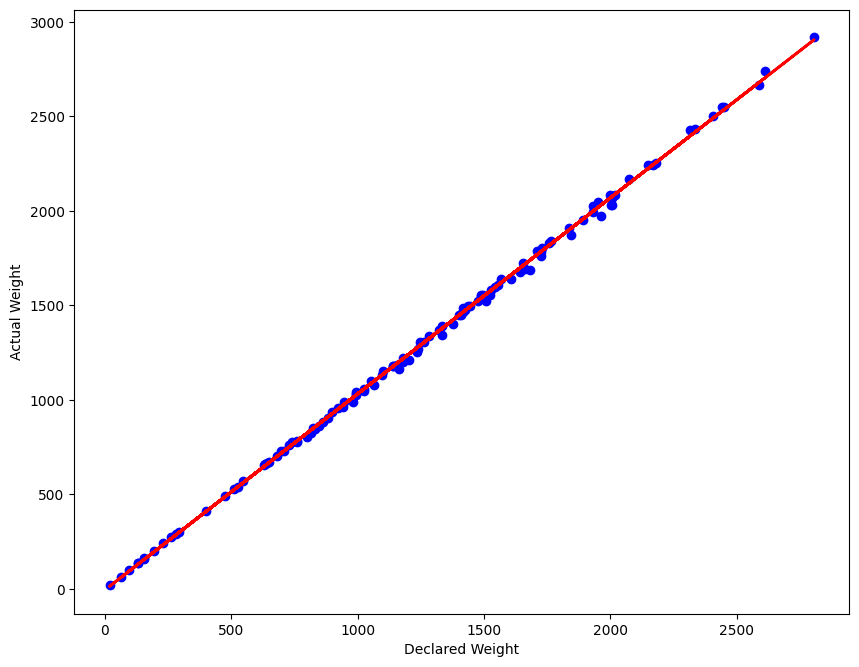

In [19]:
#performs the plot of data
plt.figure(figsize=(10, 8), dpi=100)
plt.scatter(x, Y,  color='b') #plots the scatter plot
plt.plot(x, previsao, color='r', linewidth=2) # performs the "line" plot
plt.xlabel("Declared Weight")
plt.ylabel("Actual Weight")
plt.show()